<a href="https://colab.research.google.com/github/Its-Binto/DreamFlow-Neural-Network/blob/main/DreamFlowNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wfdb
!pip install wfdb matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath



LOAD THE DATA

Here we download the data from physionet WFDB-Python provides us with annotation = wfdb.rdann('a05', 'apn', pn_dir='apnea-ecg', shift_samps=True) to conveniently download data from the Apnea Physionet dataset .

READING THE DATA TO CREATE OBJECT

In [ ]:
import wfdb
#Iterate through records a01 to x35 due to computational limitations could iterate through all the data
# List of record names
#test = ['a01', 'a01er', 'a01r', 'a02', 'a02er', 'a02r', 'a03', 'a03er', 'a03r', 'a04', 'a04er', 'a04r', 'a05',
   #      'b01', 'b01er', 'b01r', 'b02', 'b03', 'b04', 'b05', 'c01', 'c01er', 'c01r', 'c02', 'c02er', 'c02r', 'c03',
    #     'x07', 'x08', 'x09', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
     #     'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35']
test=['a01']
for record_name in test:
  try:
    record = wfdb.rdrecord(record_name, pn_dir='apnea-ecg')
    annotation = wfdb.rdann(record_name, 'apn', pn_dir='apnea-ecg', shift_samps=True)



    print(f"Record name: {record_name}")
    #Exception error
  except Exception as e:
    print(f"Error reading record {record_name};{e}")

# Read the number of signals

num_channels=record.n_sig

print(num_channels)

Record name: a01
1


EXTRACTING EVENTS FROM ANNOTATIONS

The Apnea Physionet dataset is annotated using 2 labels: Apnea (A), Normal (N). Where (A) corresponding to apnea events and (N) corresponding to normal. We will work with this two stages.

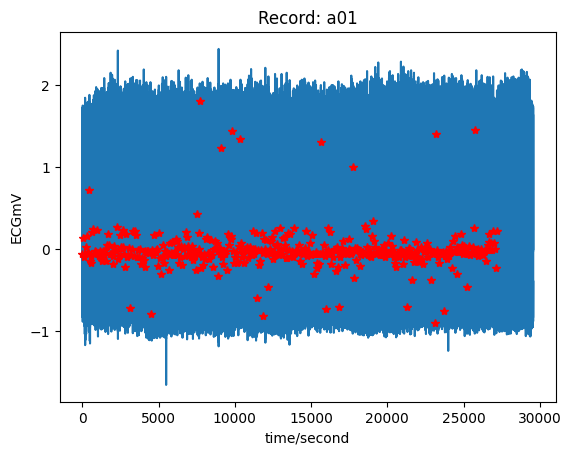

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',

In [ ]:
import wfdb

# Read the annotation file
annotation = wfdb.rdann('a05', 'apn', pn_dir='apnea-ecg', shift_samps=True)

# Plot the annotation samples
wfdb.plot_wfdb(record=record, annotation=annotation, time_units='seconds')

print(annotation.symbol)# Array of annotation symbols
print(annotation.sample)# Array of sample numbers where annotations occur

Now we access the number of signals and the sampling frequency using the record.p_signal and fs attributes. Finally, we calculate the window length in samples for a 60-second window.

**Splitting Data Apnea and Normal events into different Files**

In [ ]:
import wfdb
import os
import numpy as np

# List of record names
test = ['a01']

# Create directory if they don't exist
output_directory_n = 'N'
output_directory_a = 'A'
os.makedirs(output_directory_n, exist_ok=True)
os.makedirs(output_directory_a, exist_ok=True)

# Loop through record names
for record_name in test:
    try:
        # Read the record and annotations
        record = wfdb.rdrecord(record_name, pn_dir='apnea-ecg')

        # Modify this line to extract only the relevant columns (e.g., first 20 columns)
        annotation = wfdb.rdann(record_name, 'apn', pn_dir='apnea-ecg', shift_samps=True)

        # Select only the relevant columns (e.g., first 20 columns)
        relevant_columns = 20
        annotation_subset = annotation.sample[:relevant_columns]

        # Combine all ECG data for 'N' label into a single raw vector
        raw_vectors_n = [record.p_signal[start:start + 5999].flatten() for label, start in
                         zip(annotation.symbol, annotation_subset) if label == 'N']
        window_p = record.p_signal.flatten()
        if raw_vectors_n:
            # Save to Normal.csv file in folder N
            output_path_n = os.path.join(output_directory_n, 'Normalo.csv')

            # Save the raw vectors as columns in a CSV file
            with open(output_path_n, 'a') as file_n:
                np.savetxt(file_n, np.column_stack(raw_vectors_n), delimiter=',', fmt='%f')
            print(f'Saved N segments to {output_path_n}')

        # Combine all ECG data for 'A' label into a single raw vector
        raw_vectors_a = [record.p_signal[start:start + 5999].flatten() for label, start in
                         zip(annotation.symbol, annotation_subset) if label == 'A']
        window_p = record.p_signal.flatten()
        if raw_vectors_a:
            # Save to Apnea.csv file in folder A
            output_path_a = os.path.join(output_directory_a, 'Apneao.csv')

            # Save the raw vectors as columns in a CSV file
            with open(output_path_a, 'a') as file_a:
                np.savetxt(file_a, np.column_stack(raw_vectors_a), delimiter=',', fmt='%f')
            print(f'Saved A segments to {output_path_a}')

    except Exception as e:
        print(f"Error reading record {record_name}: {e}")


Saved N segments to N/Normalo.csv
Saved A segments to A/Apneao.csv


**Data Loading, Preprocessing, and Train-Test Splitting**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load data from 'A.csv' and 'N.csv'
data_a = np.genfromtxt('/content/A/Apneao.csv', delimiter=',')
data_n = np.genfromtxt('/content/N/Normalo.csv', delimiter=',')

print(data_a.shape)
print(data_n.shape)
# Define the subset of columns to use
columns_to_use = 7  # Adjust this based on your requirement

# Use only the selected columns from each dataset
data_a = data_a[:, :columns_to_use]
data_n = data_n[:, :columns_to_use]

# Assuming each row is a record
labels_a = np.ones(data_a.shape[0])  # Assuming '1' for 'A' labels
labels_n = np.zeros(data_n.shape[0])  # Assuming '0' for 'N' labels
print("data_a :",data_a.shape)
print("data_n :",data_n.shape)


# Combine data and labels
X = np.concatenate([data_a, data_n])
y = np.concatenate([labels_a, labels_n])


# Create a MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
X_normalized = scaler.fit_transform(X)

# Split the normalized data into train and test sets
X_train_norm, X_test_norm, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, shuffle=True
)

# Split the data into training and validation sets
X_train_ens, X_val_ens, y_train_ens, y_val_ens = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, shuffle=True
)

# Display the shapes of the resulting arrays
print("X_train shape:", X_train_ens.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_val_ens.shape)
print("y_test shape:", y_test.shape)


(11998, 7)
(11998, 13)
data_a : (11998, 7)
data_n : (11998, 7)
X_train shape: (19196, 7)
y_train shape: (19196,)
X_test shape: (4800, 7)
y_test shape: (4800,)


**Definition and Compilation of the Neural Network Architecture**

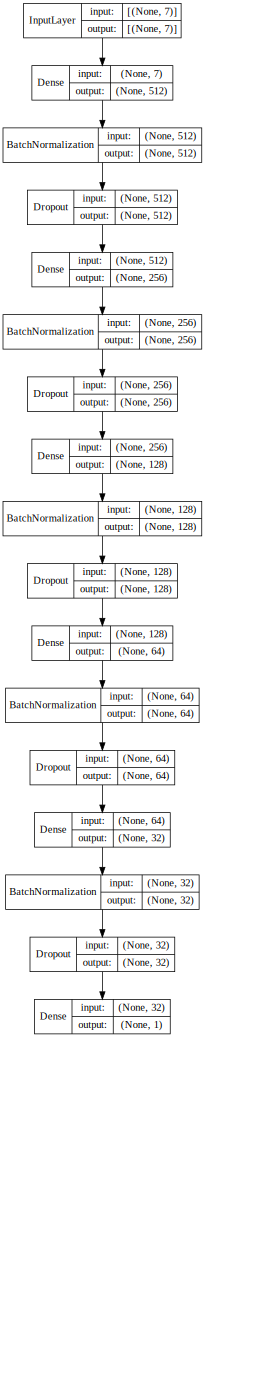

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG

# Define a neural network architecture
model = Sequential()

# Adding layers with a  complex architecture
model.add(Dense(units=512, activation='relu', input_dim=7, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=32, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the more complex model
model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the more complex neural network architecture
SVG(model_to_dot(model, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))



**Training with Callbacks**

In [ ]:
epochs=50
batch_size=32

# Callbacks for training
callbacks = [
    TensorBoard(log_dir='./logs_more_complex', batch_size=batch_size, write_graph=False),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# Train the more complex model
history_more_complex = model.fit(X_train_norm, y_train,
                                              epochs=epochs,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              validation_data=(X_val_ens, y_val_ens),
                                              callbacks=callbacks)


Epoch 1/50
600/600 [==============================] - 12s 20ms/step - loss: 0.6927 - accuracy: 0.5288 - val_loss: 0.6898 - val_accuracy: 0.5244 - lr: 0.0010
Epoch 2/50
600/600 [==============================] - 6s 10ms/step - loss: 0.6901 - accuracy: 0.5416 - val_loss: 0.6874 - val_accuracy: 0.5369 - lr: 0.0010
Epoch 3/50
600/600 [==============================] - 7s 12ms/step - loss: 0.6890 - accuracy: 0.5395 - val_loss: 0.6841 - val_accuracy: 0.5462 - lr: 0.0010
Epoch 4/50
600/600 [==============================] - 6s 11ms/step - loss: 0.6875 - accuracy: 0.5478 - val_loss: 0.6827 - val_accuracy: 0.5540 - lr: 0.0010
Epoch 5/50
600/600 [==============================] - 8s 13ms/step - loss: 0.6860 - accuracy: 0.5562 - val_loss: 0.6785 - val_accuracy: 0.5675 - lr: 0.0010
Epoch 6/50
600/600 [==============================] - 6s 10ms/step - loss: 0.6844 - accuracy: 0.5599 - val_loss: 0.6760 - val_accuracy: 0.5725 - lr: 0.0010
Epoch 7/50
600/600 [==============================] - 8s 13ms/s

**Plotting and Saving Training History**

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


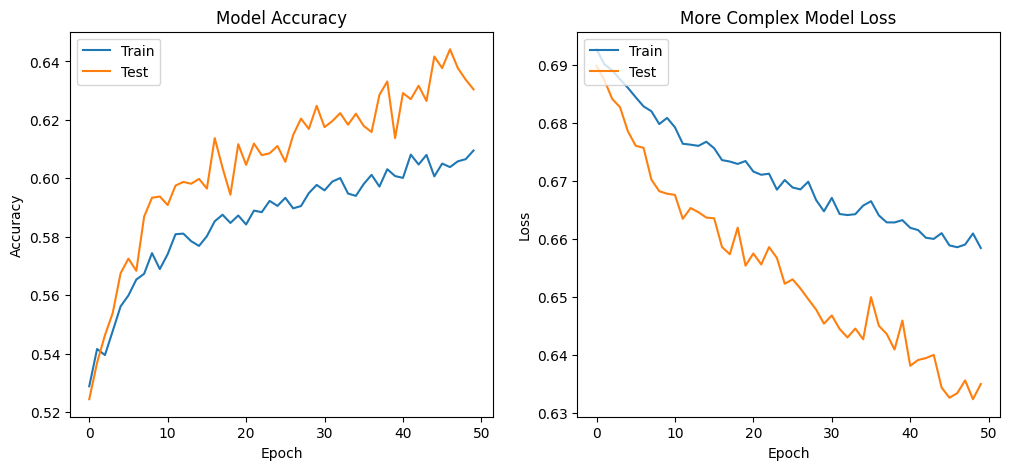

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Assuming 'model' is your Keras model
model.save('my_model.h5')

# Plot and save training history for more complex model
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_more_complex.history['accuracy'])
plt.plot(history_more_complex.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_more_complex.history['loss'])
plt.plot(history_more_complex.history['val_loss'])
plt.title('More Complex Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

# Save the plot for more complex model
plt.savefig('training_history_more_complex.png')
plt.show()


**Evaluating Model Performance on Test Set and Visualizing Results**

120/120 [==============================] - 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.83      0.64      1923
         1.0       0.58      0.24      0.34      1917

    accuracy                           0.53      3840
   macro avg       0.55      0.53      0.49      3840
weighted avg       0.55      0.53      0.49      3840



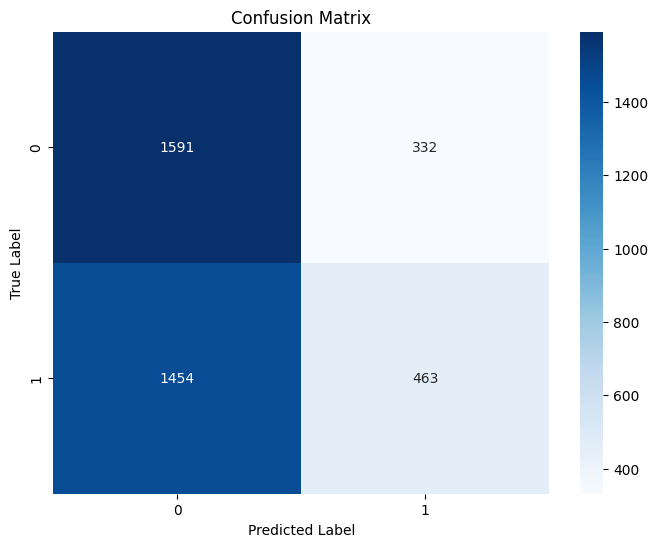

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_train_ens, y_train_ens, X_val_ens, y_val_ens are defined earlier

# Assuming X_test_ens, y_test_ens are your test set
# If you don't have a separate test set, you can split your data for evaluation
X_train_split, X_test_ens, y_train_split, y_test_ens = train_test_split(X_train_ens, y_train_ens, test_size=0.2, random_state=42)

# Standardize the test set based on the training set
scaler = StandardScaler()
X_test_ens = scaler.fit_transform(X_test_ens)

# Assuming model is your trained model

# Evaluate the model on the test set
y_pred = model.predict(X_test_ens)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification Report
classification_rep = classification_report(y_test_ens, y_pred_classes)
print("Classification Report:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_ens, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
